# Projeto Estatística Descritiva de Dados
## Lucas Natan Correia Couri e Mariama Oliveira

# Análise exploratória

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
InteractiveShell.ast_node_interactivity = 'all'

In [93]:
dados = pd.read_csv("dataset_stroke.csv")

In [94]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [95]:
dados.shape

(5110, 12)

## Pré-processamento de dados

In [96]:
dados.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Convertendos tipos "object" para "category"

In [97]:
dados['gender'] = dados['gender'].astype('category')
dados['ever_married'] = dados['ever_married'].astype('category')
dados['work_type'] = dados['work_type'].astype('category')
dados['Residence_type'] = dados['Residence_type'].astype('category')
dados['smoking_status'] = dados['smoking_status'].astype('category')
dados['hypertension'] = dados['hypertension'].astype('category')
dados['heart_disease'] = dados['heart_disease'].astype('category')
dados['stroke'] = dados['stroke'].astype('category')


In [98]:
dados[(dados['age']<2) & (dados['stroke']==0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
597,40639,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [99]:
dados.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


<AxesSubplot:>

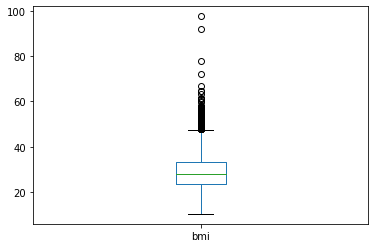

In [100]:
dados['bmi'].plot.box()

### **Verificando dados nulos**

In [101]:
dados.isnull().sum()/len(dados)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [102]:
dados['gender'].value_counts() 
dados['ever_married'].value_counts()
dados['work_type'].value_counts()
dados['Residence_type'].value_counts()
dados['smoking_status'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [103]:
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,4612,4834,4861
1,498,276,249


In [104]:
dados[(dados['bmi'].isnull()) & (dados['stroke']==1)].shape

(40, 12)

In [105]:
dados[(dados['stroke']==1)].shape

(249, 12)

### Iremos retirar as instâncias que apresentam valores nulos para bmi (IMC). Futuramente, iremos comparar se caso esse atributo for inputado, o classificador apresentará uma melhor performance.

In [106]:
#dados.dropna(inplace = True)
dados['bmi'] = dados['bmi'].fillna(dados['bmi'].mean())

In [107]:
dados[dados.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [108]:
dados[ ( dados['smoking_status']=="Unknown" ) & ( dados['stroke']==1 ) ].shape

(47, 12)

In [109]:
#dados.shape #4909
dados = dados[dados['smoking_status']!="Unknown"]

In [110]:
dados = dados[dados['gender']!="Other"]

# Análise

Verificando distribuição dos atributos

In [111]:
# ax = sns.countplot(x="stroke", data=dados)
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


In [112]:
#dados['hypertension'] 
#dados['heart_disease']
#dados['stroke']
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,3119,3337,3363
1,446,228,202


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

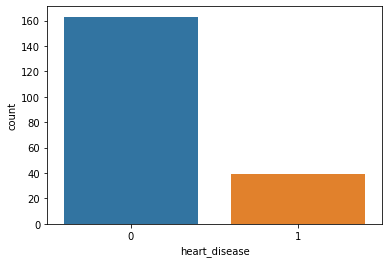

In [113]:
sns.countplot(x="heart_disease", data=dados[dados['stroke']==1])

In [114]:
### Fazer os graficos para as categoricas (4 plots por janela)
### Fazer os graficos para as categoricas apenas para stroke==1

<AxesSubplot:xlabel='age', ylabel='Count'>

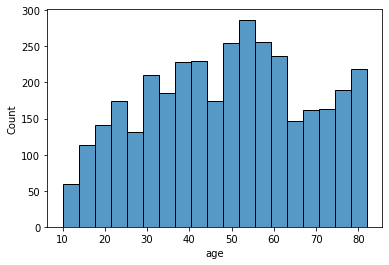

In [115]:
sns.histplot(data=dados, x="age")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

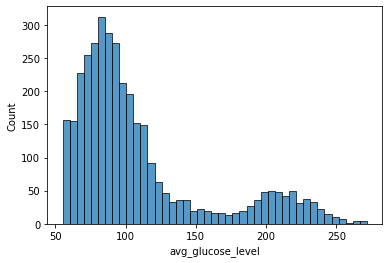

In [116]:
sns.histplot(data=dados, x="avg_glucose_level")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

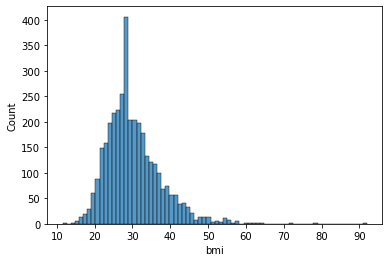

In [117]:
sns.histplot(data=dados, x="bmi")

<AxesSubplot:xlabel='age', ylabel='bmi'>

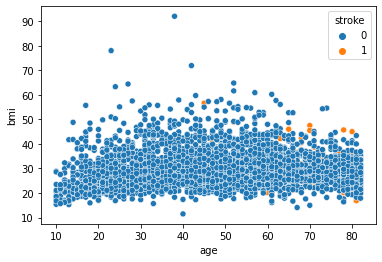

In [118]:
sns.scatterplot(data=dados, x="age", y="bmi", hue=dados['stroke'])

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

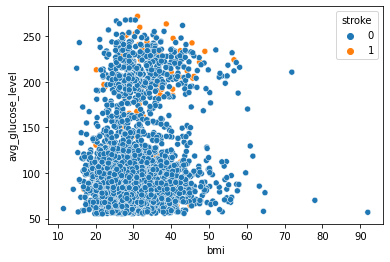

In [119]:
sns.scatterplot(data=dados, x="bmi", y="avg_glucose_level", hue=dados['stroke'])

In [120]:
dados.corr(method='pearson')

,id,age,avg_glucose_level,bmi
id,1.000000,-0.000271,0.000734,0.001418
age,-0.000271,1.000000,0.233005,0.075524
avg_glucose_level,0.000734,0.233005,1.000000,0.149015
bmi,0.001418,0.075524,0.149015,1.000000


## Discretizando variáveis contínuas

In [121]:
dados['faixaIdade'] = pd.cut(dados['age'], [0, 10, 25, 50, 75, 90])

In [122]:
dados['faixaIMC'] = pd.cut(dados['bmi'], [0, 18.5, 25, 30, 40, 100])

In [123]:
dados['faixaGlicose'] = pd.cut(dados['avg_glucose_level'], [0, 70, 100, 125, 300])
#https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

In [124]:
dados['faixaIdade'] = dados['faixaIdade'].astype('category')
dados['faixaIMC'] = dados['faixaIMC'].astype('category')
dados['faixaGlicose'] = dados['faixaGlicose'].astype('category')

# Classificador Naive Bayes

## Com scikit

Separando em dados de treinamento e teste

In [125]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,faixaIdade,faixaIMC,faixaGlicose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,"(50, 75]","(30.0, 40.0]","(125, 300]"
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,"(50, 75]","(25.0, 30.0]","(125, 300]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,"(75, 90]","(30.0, 40.0]","(100, 125]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,"(25, 50]","(30.0, 40.0]","(125, 300]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,"(75, 90]","(18.5, 25.0]","(125, 300]"


In [126]:
X = dados.drop(columns='stroke')

y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Codificando as variáveis

In [127]:
X_trainNB = X_train
X_testNB = X_test
#X_trainNB
#X_testNB

In [128]:
cat_columns = X_trainNB.select_dtypes(['category']).columns
X_trainNB[cat_columns] = X_trainNB[cat_columns].apply(lambda x: x.cat.codes)

cat_columns = X_testNB.select_dtypes(['category']).columns
X_testNB[cat_columns] = X_testNB[cat_columns].apply(lambda x: x.cat.codes)

X_trainNB = X_trainNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])
X_testNB = X_testNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])




C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [129]:
# With sklearn
ctgrclNB = CategoricalNB(alpha=1)
ctgrclNB.fit(X_trainNB, y_train)
ctgrclNB.predict_proba(np.array(X_testNB))

CategoricalNB(alpha=1)

array([[9.82337988e-01, 1.76620116e-02],
       [9.97293013e-01, 2.70698661e-03],
       [8.94979819e-01, 1.05020181e-01],
       ...,
       [8.57841566e-01, 1.42158434e-01],
       [9.99442688e-01, 5.57311515e-04],
       [7.10947457e-01, 2.89052543e-01]])

In [130]:
y_pred = ctgrclNB.predict(np.array(X_testNB))

In [131]:
f1_score(y_test, y_pred, average=None)
# accuracy_score(y_test, y_pred)

#res_df = pd.DataFrame(resultado_predicao, y_test)

array([0.9604299 , 0.12903226])

In [152]:
confusion_matrix(y_test, y_pred) #tn, fp, fn, tp

array([[983,  20],
       [ 61,   6]], dtype=int64)

In [161]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.94      0.98      0.96      1003
      stroke       0.23      0.09      0.13        67

    accuracy                           0.92      1070
   macro avg       0.59      0.53      0.54      1070
weighted avg       0.90      0.92      0.91      1070



## Sem scikit

In [132]:
trainNB = X_trainNB
trainNB['stroke'] = y_train
trainNB.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,faixaIdade,faixaIMC,faixaGlicose,stroke
1878,1,0,0,1,3,0,1,3,1,2,0
5012,0,0,0,1,2,1,3,2,2,1,0
2794,1,0,0,0,2,0,2,1,1,2,0
2587,1,0,0,1,2,0,2,2,3,1,0
4664,0,0,0,0,2,0,2,2,2,0,0


In [133]:
def calculoProbPosteriori(entradaTestar, conjuntoTreino):
    
    arrayProbabilidades = [[],[]]
    for nomeColuna in conjuntoTreino.columns: #exceto stroke?

        if nomeColuna!="stroke":   
            valorTestar = entradaTestar[nomeColuna] #Ver se precisa passar o valor da linha (0)
 
            atributoNao = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==0)]) / len(conjuntoTreino[conjuntoTreino['stroke']==0])
            atributoSim = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==1)]) / len(conjuntoTreino[conjuntoTreino['stroke']==1])

            arrayProbabilidades[0].append(atributoNao)
            arrayProbabilidades[1].append(atributoSim)

        #genderp0 = (len(XcomY[(XcomY['gender']==1)&(XcomY['stroke']==0)])+1) / (len(XcomY[XcomY['Y']==0])+(1*5))
        #ctgrclX15p1 = (len(XcomY[(XcomY['gender']==1)&(XcomY['stroke']==1)])+1) / (len(XcomY[XcomY['Y']==1])+(1*5))


    return arrayProbabilidades




In [134]:
def calculoProbabilidadePred(listaProbabilidades, conjuntoTreino):

    Likelihood0 = np.prod(listaProbabilidades[0])
    Likelihood1 = np.prod(listaProbabilidades[1])

    ProbStroke0 = len(conjuntoTreino[conjuntoTreino['stroke']==0])/len(conjuntoTreino)
    ProbStroke1 = len(conjuntoTreino[conjuntoTreino['stroke']==1])/len(conjuntoTreino)


    ProbTotal = (ProbStroke0*Likelihood0) + (ProbStroke1*Likelihood1)

    probNao = (ProbStroke0*Likelihood0)/ProbTotal
    probSim = (ProbStroke1*Likelihood1)/ProbTotal
    return 0 if probNao>probSim else 1

In [135]:
##Iterar sobre a base de teste
def predictStroke(conjuntoTreino, conjuntoTeste) :

    arrayPred = []
    ##Loop que determina todas as predicoes
    for index, linha in conjuntoTeste.iterrows():
        resposta = calculoProbPosteriori(linha, conjuntoTreino)
        predicao = calculoProbabilidadePred(resposta, conjuntoTreino)
        print(index , ": ", predicao)
        arrayPred.append(predicao)
   
    return arrayPred

In [136]:
pred_Y  =  predictStroke(trainNB, X_test)


1273 :  0
3874 :  0
2686 :  0
2833 :  0
3180 :  0
1695 :  0
979 :  0
4857 :  0
2847 :  0
3158 :  0
1073 :  0
1443 :  0
4304 :  0
3286 :  0
2224 :  0
3395 :  0
3337 :  0
2265 :  0
3732 :  0
1033 :  0
3257 :  0
3660 :  0
3120 :  0
5066 :  0
765 :  0
2922 :  0
2529 :  0
405 :  0
4818 :  0
417 :  0
3134 :  0
675 :  0
3055 :  0
4913 :  0
2456 :  0
4064 :  0
418 :  0
709 :  0
4229 :  0
86 :  0
2971 :  0
2537 :  0
2051 :  0
515 :  0
2719 :  0
4166 :  0
4524 :  0
4136 :  0
4156 :  0
4034 :  0
381 :  0
2014 :  0
4643 :  0
4858 :  0
725 :  0
1435 :  0
4845 :  0
3050 :  0
239 :  0
2654 :  0
115 :  0
2271 :  0
4560 :  0
600 :  0
1333 :  0
2510 :  0
1508 :  0
1963 :  0
559 :  0
4356 :  0
965 :  0
4516 :  0
1682 :  0
2438 :  0
3557 :  0
2897 :  0
773 :  0
992 :  1
4167 :  0
1549 :  0
2312 :  0
387 :  0
2526 :  0
1150 :  0
748 :  0
2250 :  0
33 :  1
4098 :  0
4687 :  0
4294 :  0
1457 :  0
40 :  0
3569 :  0
2048 :  0
4029 :  0
61 :  0
1160 :  0
538 :  0
218 :  1
3253 :  0
1896 :  0
2334 :  0
424 :  0


In [137]:
pred_Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [138]:
f1_score(y_test, pred_Y, average=None)
#([0.9604299 , 0.12903226]) resultado do scikit

array([0.9594132 , 0.12631579])

In [148]:
confusion_matrix(y_test, pred_Y) #tn, fp, fn, tp

array([[981,  22],
       [ 61,   6]], dtype=int64)

In [160]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_Y, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.94      0.98      0.96      1003
      stroke       0.21      0.09      0.13        67

    accuracy                           0.92      1070
   macro avg       0.58      0.53      0.54      1070
weighted avg       0.90      0.92      0.91      1070



## KNN

In [139]:
X_trainKN = X_train.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
X_testKN = X_test.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])

In [140]:
train_dummies = pd.get_dummies(X_trainKN[["work_type", "smoking_status"]].astype(str))
test_dummies = pd.get_dummies(X_testKN[["work_type", "smoking_status"]].astype(str))

In [141]:
X_trainKN = X_trainKN.join(train_dummies)
X_testKN = X_testKN.join(test_dummies)

In [142]:
knnClassifier = KNeighborsClassifier(n_neighbors=1)
knnClassifier.fit(X_trainKN, y_train)
pred_KN = knnClassifier.predict(X_testKN)


KNeighborsClassifier(n_neighbors=1)

In [144]:
f1_score(y_test, pred_KN, average=None)

array([0.95106278, 0.15384615])

In [147]:
confusion_matrix(y_test, pred_KN) #tn, fp, fn, tp

array([[962,  41],
       [ 58,   9]], dtype=int64)

In [159]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_KN, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.94      0.96      0.95      1003
      stroke       0.18      0.13      0.15        67

    accuracy                           0.91      1070
   macro avg       0.56      0.55      0.55      1070
weighted avg       0.90      0.91      0.90      1070



In [151]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_KN).ravel()
tn, fp, fn, tp

(962, 41, 58, 9)